In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [2]:
# 데이터를 불러오는 코드를 작성해주세요.
fashion_mnist = keras.datasets.fashion_mnist
((train_images, train_labels), (test_images, test_labels))= fashion_mnist.load_data()

In [3]:
# 데이터의 크기를 shape 함수를 통해 출력해주세요.
print(f"train_images.shape: {train_images.shape}")
print(f"train_labels.shape: {train_labels.shape}")
print(f"test_images.shape: {test_images.shape}")
print(f"test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


In [4]:
# 레이블을 설정해보세요.
labels = ["T-shirt/top",  # index 0
        "Trouser",      # index 1
        "Pullover",     # index 2 
        "Dress",        # index 3 
        "Coat",         # index 4
        "Sandal",       # index 5
        "Shirt",        # index 6 
        "Sneaker",      # index 7 
        "Bag",          # index 8 
        "Ankle boot"]   # index 9
def idx2label(idx):
    return labels[idx]

In [5]:
idx2label(test_labels[0])

'Ankle boot'

In [6]:
test_labels[0]

9

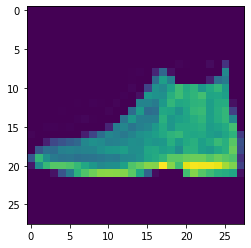

Ankle boot


In [7]:
plt.imshow(test_images[0])
plt.show()
print(idx2label(test_labels[0]))

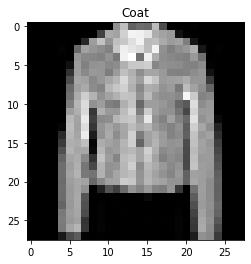

In [8]:
plt.imshow(test_images[10], cmap="gray")
plt.title(idx2label(test_labels[10]))
plt.show()

In [9]:
def show(idx):
    plt.imshow(train_images[idx])#, cmap="gray")
    plt.title(idx2label(train_labels[idx]))
    plt.show()

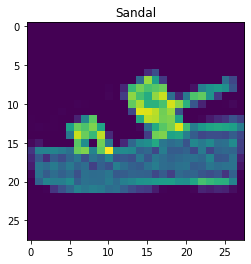

In [10]:
show(12)

In [11]:
train_images[train_images != 0][:5]

array([ 1, 13, 73,  1,  4], dtype=uint8)

## 이미지의 값이 가장 큰 idx와 작은 idx를 구하여 출력해보세요 = argmax

In [12]:
train_images.reshape((60000,-1)).sum(axis=1).argmax()

55023

In [13]:
train_images.reshape((60000,-1)).sum(axis=1).argmin()

9230

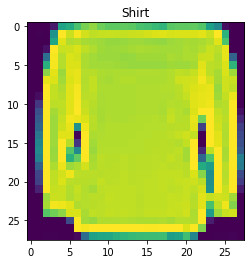

In [14]:
show(55023)

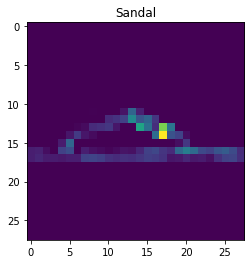

In [15]:
show(9230)

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
train_images.reshape((60000,-1)).shape

(60000, 784)

In [18]:
train_images.reshape((60000,-1)).sum(axis=1).shape

(60000,)

In [19]:
train_images.reshape((60000,-1)).sum(axis=1)[0]

76247

In [20]:
train_images.reshape((60000,-1)).sum(axis=1)[55023]

150387

In [21]:
train_images.dtype

dtype('uint8')

In [22]:
print(  train_images.min(), train_images.max())
print(  test_images.min(), test_images.max())

print(  train_labels.min(), train_labels.max())
print(  test_labels.min(), test_labels.max())

0 255
0 255
0 9
0 9


In [23]:
print(train_images.dtype)
print(test_images.dtype)

print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())

uint8
uint8
0 255
0 255


In [24]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [25]:
print(train_images.dtype)
print(test_images.dtype)

print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())

float64
float64
0.0 255.0
0.0 255.0


In [26]:
# images의 값이 0-1사이의 값을 같도록 코드를 작성해보세요.
(train_images / 255.0).min(), (train_images / 255.0).max()

(0.0, 1.0)

일반적으로 0-1사의의 값을 가지게 하기 위해서는 다음 수식을 사용합니다.

$$normalize(x) = \frac{x - 최소값}{최대값 - 최소값}$$

이 경우 최소값이 0이기 떄문에 다음과 같이 간편하게 구할 수 있습니다.

$$normalize(x) = \frac{x}{최대값}$$

In [27]:
def norm(data):
    min_v = data.min()
    max_v = data.max()
    return (data - min_v)/(max_v - min_v)

In [28]:
print( norm(train_images).min(), norm(train_images).max())
print( norm(test_images).min(), norm(test_images).max())

0.0 1.0
0.0 1.0


In [29]:
# 스케일링 방법을 바꿔서 시도하기
a = norm(train_images)*3
print(a.min(), a.max())

a = norm(train_images)*4
print(a.min(), a.max())

0.0 3.0
0.0 4.0


In [30]:
train_images = norm(train_images)
test_images = norm(test_images)

## 시각화

In [31]:
# (60000, 28, 28)인 train_images에서 (5, 28, 28)을 획득하는 코드를 작성하세요.
train_images[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [32]:
# transpose는 tensor의 axis를 섞는 기능을 합니다.
# 해당 기능을 이용해서 (28, 140)을 작성하는 코드를 작성해보세요.

train_images[:5].transpose((1,0,2)).shape

(28, 5, 28)

In [33]:
train_images[:5].transpose((1,0,2)).reshape((28,-1)).shape

(28, 140)

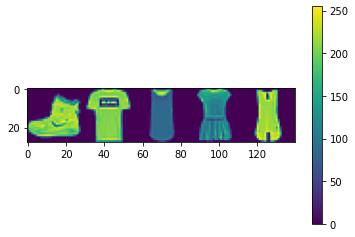

In [65]:
plt.imshow(train_images[:5].transpose((1,0,2)).reshape((28,-1)))
plt.colorbar()
plt.show()

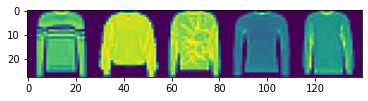

In [70]:
plt.imshow(  train_images[ np.argwhere(  train_labels ==  2  )[:5, ..., 0]  ] . transpose((1, 0, 2)).reshape((28, -1)) )

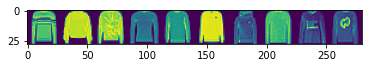

In [73]:
plt.imshow(train_images[ np.argwhere( train_labels == 2)[:10, ..., 0]]. transpose((1, 0, 2)).reshape((28, -1)))

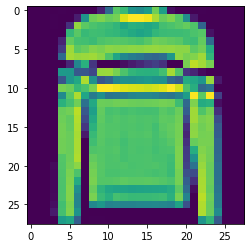

In [74]:
plt.imshow(train_images[ np.argwhere( train_labels == 2)[:1, ..., 0]]. transpose((1, 0, 2)).reshape((28, -1)))

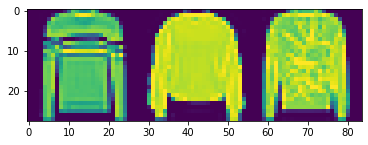

In [75]:
plt.imshow(train_images[ np.argwhere( train_labels == 2)[:3, ..., 0]]. transpose((1, 0, 2)).reshape((28, -1)))

In [34]:
# 레이블에 따라 5개를 출력하는 함수를 만들어보세요.
def label_filter(label, count = 5):
    imgs = train_images[ np.argwhere( train_labels == label)[:count, ..., 0]]. transpose((1, 0, 2)).reshape((28, -1))
    plt.imshow(imgs)
    plt.show()

In [39]:
def expand_4times(img):
    bg = np.zeros(img.shape)
    idx = np.random.randint(0,4)
    slots= [bg,bg,bg,bg]
    slots[idx] =img
    expand = np.vstack([np.hstack(slots[:2]),
                        np.hstack(slots[2:])
                       ])
    
    return expand
    

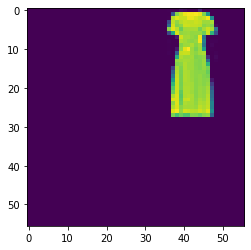

In [60]:
plt.imshow(expand_4times(train_images[50]))

In [61]:
# 4배 이미지 변환을 전체 train/test 데이터에 실행하여 train_expend_images, test_expend_images를 생성하세요.
train_expand_images = np.array([expand_4times(img) for img in train_images])
test_expand_images = np.array([expand_4times(img) for img in test_images])

In [62]:
print(test_expand_images.shape, train_expand_images.shape)
print(test_expand_images.dtype, train_expand_images.dtype)

print(test_expand_images.min(), train_expand_images.min())
print(test_expand_images.max(), train_expand_images.max())

(10000, 56, 56) (60000, 56, 56)
float64 float64
0.0 0.0
1.0 1.0


In [73]:
# 4배 이미지 변환 함수를 수정하여 이미지 사이즈를 4배 확대 시킨 뒤, 객체를 랜덤으로 1~4개, 랜덤 4분면에 위치시키는 함수를 작성하세요.
def expand_4times2(train_data, label_data):
    img = []
    label = []
    
    for _ in range(4):
        bg = np.zeros((28, 28))
        idx_count = np.random.randint(0, 5)
        
        label = np.zeros((10,)) # [0,0,0,0,......]

        slots = [bg, bg, bg, bg]
        
        for idx in range(idx_count):
            i = np.random.randint(len(train_data))
            slots[idx] = train_data[i]
            label += tf.keras.utils.to_categorical(label_data[i], 10)
        
        np.random.shuffle(slots)
    
    new_img = np.vstack([
                            np.hstack(slots[:2]),
                            np.hstack(slots[2:])
    ])
    img.append(new_img)
    labels.append((label >= 1 ).astype(np.int))
    
    
    return np.array(img), np.array(label)

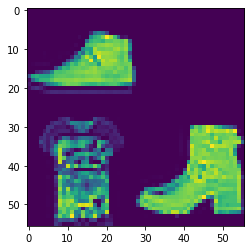

In [74]:
plt.imshow(expand_4times2(train_images, train_labels)[0][0])

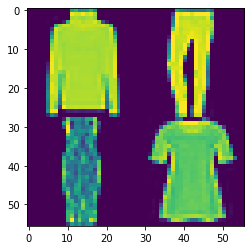

In [75]:
# 4배 이미지 변환 함수를 수정하여 이미지 사이즈를 4배 확대 시킨 뒤, 객체를 랜덤으로 1~4개, 랜덤 4분면에 위치시키는 함수를 작성하세요.
def expand_4times2(x_data, y_data):
    images = []
    labels = []

    for _ in range(4):
        bg = np.zeros((28, 28))
        obj_count = np.random.randint(0, 5)

        label = np.zeros((10,)) # [0,0,0,0,0,0,0 ...]
        slots = [bg, bg, bg, bg]

        for idx in range(obj_count):
            i = np.random.randint(len(x_data))
            slots[idx] = x_data[i]
            label += tf.keras.utils.to_cat
def expand_4times2(x_data, y_data):
    images = []
    labels = []

    for _ in range(4):
        bg = np.zeros((28, 28))
        obj_count = np.random.randint(0, 5)

        label = np.zeros((10,)) # [0,0,0,0,0,0,0 ...]
        slots = [bg, bg, bg, bg]

        for idx in range(obj_count):
            i = np.random.randint(len(x_data))
            slots[idx] = x_data[i]

            label += tf.keras.utils.to_categorical(y_data[i], 10)
            
        np.random.shuffle(slots)

    new_img = np.vstack([
                          np.hstack(slots[:2]),
                          np.hstack(slots[2:])
    ])
    images.append(new_img)
    labels.append((label >= 1 ).astype(np.int))    
    return np.array(images), np.array(labels)
plt.imshow(  expand_4times2(train_images, train_labels)[0][0]  )

In [76]:
# 4배 이미지 변환을 전체 train/test 데이터에 실행하여 train_multi_images, test_multi_images, train_multi_labels, train_multi_labels를 생성하세요.

In [77]:
# 4배 이미지 변환을 전체 train/test 데이터에 실행하여 train_multi_images, test_multi_images, train_multi_labels, train_multi_labels를 생성하세요.
train_multi_images, train_multi_labels = list(zip(*[expand_4times2(train_images, train_labels) for i in train_images]))
test_multi_images, test_multi_labels = list(zip(*[expand_4times2(test_images, test_labels) for i in test_images]))
train_multi_images = np.array(train_multi_images)[:, 0, :, :].reshape(-1, 56, 56, 1)
train_multi_labels = np.array(train_multi_labels)[:, 0, :]

test_multi_images = np.array(test_multi_images)[:, 0, :, :].reshape(-1, 56, 56, 1)
test_multi_labels = np.array(test_multi_labels)[:, 0, :]


In [78]:
print(train_multi_images.shape, train_multi_labels.shape)
print(test_multi_images.shape, test_multi_labels.shape)
# 개수에 따라 연속된 그림을 보여주는 함수를 작성해보세요

(60000, 56, 56, 1) (60000, 10)
(10000, 56, 56, 1) (10000, 10)


In [83]:
def filter2(obj,count):
    labels = train_multi_labels.sum(axis=1)
    idx = np.argwhere(labels==obj)[:count,0]
    
    imgs = train_multi_images[idx][...,0].transpose((1,0,2)).reshape((56,-1))
    plt.imshow(imgs)
    plt.show()
    

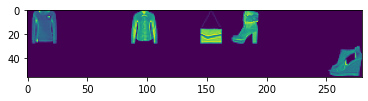

In [84]:
filter2(1,5)

In [85]:
# multi labels와 train_labels의 값의 형태를 비교해보세요.
train_labels[0]

9

In [86]:
tf.keras.utils.to_categorical(train_labels[0],10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

<BarContainer object of 10 artists>

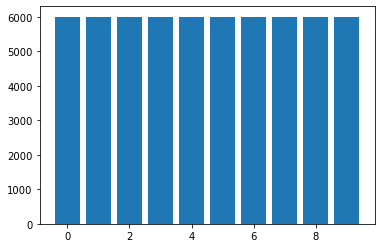

In [87]:
# 문제 20. train_labels에서 label들의 분포를 히스토그램으로 구해보세요.
plt.bar([0,1,2,3,4,5,6,7,8,9], tf.keras.utils.to_categorical(train_labels).sum(axis=0))

<BarContainer object of 10 artists>

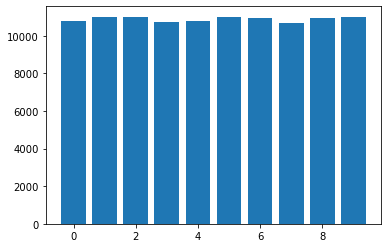

In [88]:
plt.bar([0,1,2,3,4,5,6,7,8,9], train_multi_labels.sum(axis=0))

(array([11916.,     0., 13259.,     0.,     0., 14865.,     0., 13940.,
            0.,  6020.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

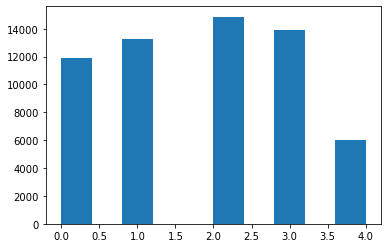

In [89]:
plt.hist(train_multi_labels.sum(axis=1))

In [101]:
# train_expand_images, train_labels로 싱글 label을 처리하는 image classification 초벌 모델을 생성해보세요.
from keras.layers import Input, Conv2D,MaxPool2D, Dropout, Dense,Flatten#, GlobalAveragePool2D
from keras.models import Model

def single_fashion_mnist_model():
    inputs = Input((56, 56, 1))
    x = Conv2D(16, 2, padding='same', activation='relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Dropout(0.3)(x)
    
    x = Conv2D(32, 2, padding = 'same', activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = Dropout(0.3)(x)
    
    x = Conv2D(64, 2, padding = 'same', activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = Flatten()(x)
    x = Dense(10, activation = 'softmax')(x)
    
    return Model(inputs, x)
    

In [102]:
model = single_fashion_mnist_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 56, 56, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 16)        80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0     

In [103]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
hist = model.fit(train_expand_images.reshape((-1,56,56,1)),
                 tf.keras.utils.to_categorical(train_labels, 10),

                 validation_data = (test_expand_images.reshape((-1,56,56,1)), tf.keras.utils.to_categorical(test_labels, 10)),
                 epochs = 15,
                 verbose = 1
                 )

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7345 - accuracy: 0.7291 - val_loss: 0.5179 - val_accuracy: 0.8117
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5020 - accuracy: 0.8161 - val_loss: 0.4668 - val_accuracy: 0.8319
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4477 - accuracy: 0.8373 - val_loss: 0.4352 - val_accuracy: 0.8411
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4145 - accuracy: 0.8500 - val_loss: 0.3758 - val_accuracy: 0.8677
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3876 - accuracy: 0.8591 - val_loss: 0.3682 - val_accuracy: 0.8716
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3716 - accuracy: 0.8640 - val_loss: 0.3468 - val_accuracy: 0.8804
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3579 - accuracy: 0.8697 - val_loss: 0.3426 - val_accuracy:

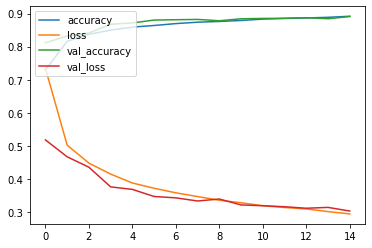

In [105]:
# hist의 accuracy plt의 plot을 이용하여 출력하는 코드를 작성하세요.
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

In [106]:
test_expand_images[0:1].shape

(1, 56, 56)

In [108]:
test_expand_images[0:1].shape
res = model.predict(test_expand_images[2].reshape(1,56,56,1))
res.shape

(1, 10)

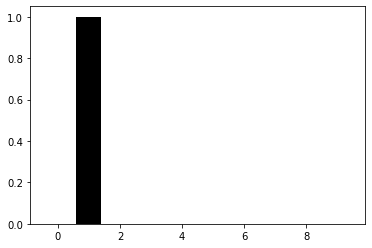

'Trouser'

In [109]:
# res의 결과와 실제 label을 비교하고 test_exnpand_images[0]을 plt로 출력하세요.
plt.bar(np.arange(0, 10), tf.keras.utils.to_categorical(test_labels[2], 10), color="black")
plt.show()

idx2label(test_labels[2])

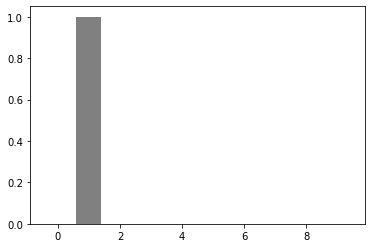

'Trouser'

In [110]:
plt.bar(np.arange(0, 10), res[0], color="gray")
plt.show()
idx2label(res[0].argmax())

In [111]:
# 모델 저장
model.save('./fashion_aug.h5')


In [112]:
model3 = tf.keras.models.load_model('./fashion_aug.h5')

In [113]:
loss, acc = model3.evaluate(test_expand_images.reshape((-1, 56,56, 1)), tf.keras.utils.to_categorical(test_labels))
print(loss, acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3027 - accuracy: 0.8910
0.30269232392311096 0.890999972820282
